In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [6]:
corr=data.corr
corr


<bound method DataFrame.corr of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]>

In [7]:
from sklearn.preprocessing import StandardScaler


In [8]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [9]:
# using kmeans
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=3,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,

               verbose=0,
               random_state=42,
               copy_x=True,

               algorithm='lloyd')

In [11]:
model.fit(data)
model.inertia_

2149.2839562217573

In [12]:
#find optimum value of K using elbow method

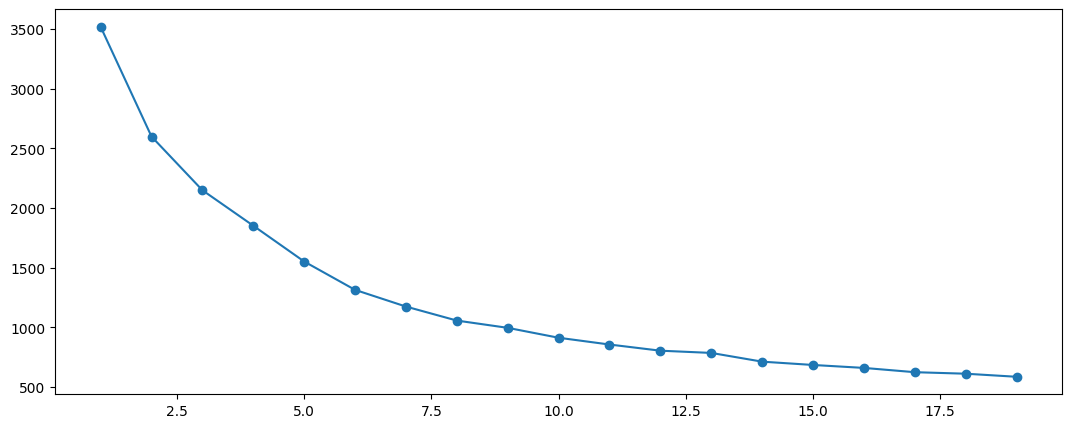

In [13]:
clusters = range(1, 20)
sse=[]
for cluster in clusters:
    model = KMeans(n_clusters=cluster,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,

               verbose=0,
               random_state=42,
               copy_x=True,

               algorithm='lloyd')

    model.fit(data)
    sse.append(model.inertia_)

sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'SSE'])
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(sse_df['cluster'], sse_df['SSE'], marker='o')

In [14]:
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia or SSE')

Text(4.444444444444452, 0.5, 'Inertia or SSE')

In [15]:
# will choose K=5 and fit the model.
model = KMeans(n_clusters=5,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,

               verbose=0,
               random_state=42,
               copy_x=True,

               algorithm='lloyd')

model.fit(data)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [16]:
print('SSE: ', model.inertia_)
print('\nCentroids: \n', model.cluster_centers_)

pred = model.predict(data)





SSE:  1551.6677076665608

Centroids: 
 [[-3.33805633e-01  3.75167418e-01  2.60749645e+00  2.22231860e+00
   9.72964050e-01  3.86855866e+00 -2.59306898e-02  5.81601504e+00]
 [ 1.44865163e+00  1.69928497e-01 -3.06362835e-01  4.17500207e-01
   6.51879518e-01 -3.57269701e-01  6.76847966e-01  6.33174701e-03]
 [-5.72772431e-01 -1.59749436e+00  1.45371704e-02 -3.44758082e-01
  -4.02466315e-01  7.96677044e-02 -4.24411072e-01 -1.33102511e-01]
 [-6.90297086e-01  5.90668285e-01  8.93504967e-02 -3.56449331e-01
  -4.54619674e-01  7.04860444e-02 -4.47765749e-01 -1.38237755e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]]


DBSCAN clustering

In [17]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.8,min_samples=6)

data_2d = np.reshape(data, (-1, 1))
model.fit(data_2d)







DBSCAN(eps=0.8, min_samples=6)

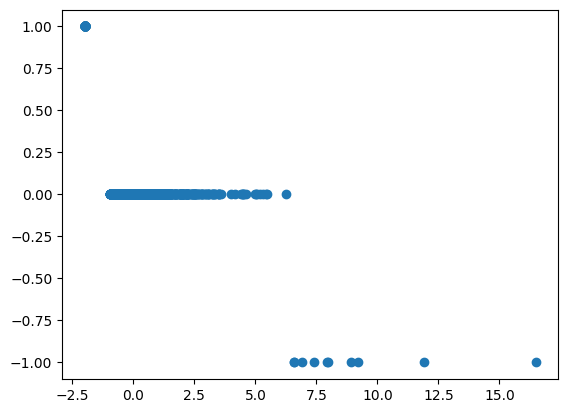

In [18]:
labels=model.fit_predict(data_2d)
plt.scatter(data_2d,labels)
plt.show()

dimensionality reduction using PCA

In [19]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [20]:
#scaling
from sklearn.preprocessing import scale
scale(data)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [21]:
#convert the array into data frame
x = pd.DataFrame(scale(data),index=data.index,columns=data.columns)
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [22]:

from sklearn.decomposition import PCA


In [23]:
pc=PCA()
pc_array=pc.fit_transform(x)
pc_array

array([[ 0.84393893, -0.51535075,  0.76763222, ...,  0.93944129,
         0.65476177,  0.01810169],
       [ 1.06267645, -0.48460126,  0.67297526, ...,  0.86722684,
         0.51102248,  0.0778948 ],
       [ 1.26914052,  0.68205455,  0.6640946 , ...,  1.07844165,
        -0.20315184, -0.2540374 ],
       ...,
       [ 3.86514909, -0.47985376,  0.52534452, ..., -0.28032041,
        -0.57529675, -0.08900336],
       [-1.09706738, -0.06989568,  0.63012755, ..., -0.33517   ,
        -0.15374358, -0.03730795],
       [-1.16595067, -0.90215675,  0.59770486, ..., -0.50872064,
         0.02436002,  0.01866823]])

In [24]:
pc_array.shape

(440, 8)

In [25]:
pc_array=pd.DataFrame(pc_array,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])


In [26]:
pc_array

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.843939,-0.515351,0.767632,0.044215,-0.446234,0.939441,0.654762,0.018102
1,1.062676,-0.484601,0.672975,-0.401372,-0.130458,0.867227,0.511022,0.077895
2,1.269141,0.682055,0.664095,-1.634953,-1.193813,1.078442,-0.203152,-0.254037
3,-1.056782,0.610821,0.505654,-0.196005,0.457855,-0.116959,-0.313804,0.054377
4,0.634030,0.974199,0.771209,-0.186374,-0.813877,1.505372,-0.160399,0.003763
...,...,...,...,...,...,...,...,...
435,0.222884,2.480505,0.360936,0.601036,1.109212,-0.364851,0.346184,0.860980
436,-1.290172,1.560397,0.756171,1.342401,-0.533462,0.205789,-0.242280,-0.226984
437,3.865149,-0.479854,0.525345,0.687132,0.108968,-0.280320,-0.575297,-0.089003
438,-1.097067,-0.069896,0.630128,-0.311821,-0.424792,-0.335170,-0.153744,-0.037308


In [27]:

pc_array.corr().round()
pc.explained_variance_ratio_*100
pc1=PCA(n_components=4)
pc1_array=pc1.fit_transform(x)
pc1_array
pc1_array=pd.DataFrame(pc1_array,columns=['PC1','PC2','PC3','PC4'])
pc1_array

,PC1,PC2,PC3,PC4
0,0.843939,-0.515351,0.767632,0.044215
1,1.062676,-0.484601,0.672975,-0.401372
2,1.269141,0.682055,0.664095,-1.634953
3,-1.056782,0.610821,0.505654,-0.196005
4,0.634030,0.974199,0.771209,-0.186374
...,...,...,...,...
435,0.222884,2.480505,0.360936,0.601036
436,-1.290172,1.560397,0.756171,1.342401
437,3.865149,-0.479854,0.525345,0.687132
438,-1.097067,-0.069896,0.630128,-0.311821
